In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to the features matrix along with actual output array
def get_numpy_data(data_frame, features, output):
    data_frame['constant']=1 #adds a constant column to the dataframe
    features = ['constant']+features #prepends 'constant' to the features list
    features_frame = data_frame[features] #assigns features (from the features list) columns to a separate dataframe
    features_matrix = features_frame.to_numpy() #converts features_frame to features_matrix in numpy
    output_series = data_frame[output] # gets output column from dataframe to an output_series
    output_array = output_series.to_numpy() # converts output_series to numpy array
    return (features_matrix, output_array)  


In [3]:
# function to get the predicted outcomes array using the features matrix and weights(calculated from regression model)
def predict_outcome(features_matrix, weights):
    predictions = []
    for i in np.dot(features_matrix, weights):
        predictions.append(i)
    return (predictions)

In [4]:
def feature_derivative(errors, feature):
    derivative = 2*(np.dot(feature, errors))
    return (derivative)

In [5]:
def regression_gradient_descent(feature_matrix, output, weights, step_size, tolerance):
    converged=False
    count=[]
    c=0
    grad_mag=[]
    while not converged:
        predictions = predict_outcome(feature_matrix, weights)
        errors = predictions - output
        gradient_sum_squares=0
        for i in range(len(weights)):
            derivative = feature_derivative(errors, feature_matrix[:,i])
            gradient_sum_squares+=(derivative**2)
            weights = weights - (step_size*derivative)
        
        gradient_magnitude = gradient_sum_squares**0.5
        print("Epoch : ", c, " Gradient_mag : ", gradient_magnitude)
        if gradient_magnitude < tolerance:
            converged=True
        c+=1
        count.append(c)
        grad_mag.append(gradient_magnitude)
    return(weights, count, grad_mag)
            

In [6]:
def regression_gradient_descent2(feature_matrix, output, weights, step_size, epochs):
    count=[]
    c=0
    grad_mag=[]
    while (c<=epochs):
        predictions = predict_outcome(feature_matrix, weights)
        errors = predictions - output
        gradient_sum_squares=0
        for i in range(len(weights)):
            derivative = feature_derivative(errors, feature_matrix[:,i])
            gradient_sum_squares+=(derivative**2)
            weights = weights - (step_size*derivative)
        
        gradient_magnitude = gradient_sum_squares**0.5
        print("Epoch : ", c, " Gradient_mag : ", gradient_magnitude)
        if gradient_magnitude < tolerance:
            converged=True
        c+=1
        count.append(c)
        grad_mag.append(gradient_magnitude)
    return(weights, count, grad_mag)
            

In [7]:
#importing the training data
train_data = pd.read_csv('train.csv')
train_data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [8]:

train_data["YearBuilt"] = 2023 - train_data["YearBuilt"]
train_data["YearRemodAdd"]=2023 - train_data["YearRemodAdd"]

In [9]:
model_features=[]
for i in train_data.columns:
    model_features.append(i)
model_features.pop()
my_output = 'SalePrice'
(feature_matrix, output) = get_numpy_data(train_data, model_features,my_output)

In [10]:
len(model_features)

10

In [11]:
#feature scaling
feature_matrix = feature_matrix.astype('float64')
for i in range(len(model_features)+1):
    feature_matrix[:,i]/=feature_matrix[:,i].max()

In [12]:
initial_weights = [50000., 10000., 10000., 1000., 10000., 10000., 10000., 50000., 100000., 10000., 10000.]
step_size = 3e-9
tolerance = 2.51e7

In [50]:
import random
num_features = len(model_features)
initial_weights = [random.uniform(-50000, 50000) for _ in range(num_features+1)]
step_size = 0.7e-7
epochs=1000

In [51]:
new_weights, count, grad_mag = regression_gradient_descent2(feature_matrix, output, initial_weights, step_size, epochs)

Epoch :  0  Gradient_mag :  883712461.7274767
Epoch :  1  Gradient_mag :  880008195.5641253
Epoch :  2  Gradient_mag :  876319466.0358661
Epoch :  3  Gradient_mag :  872646208.2489134
Epoch :  4  Gradient_mag :  868988357.5816702
Epoch :  5  Gradient_mag :  865345849.6835927
Epoch :  6  Gradient_mag :  861718620.474058
Epoch :  7  Gradient_mag :  858106606.1412367
Epoch :  8  Gradient_mag :  854509743.1409695
Epoch :  9  Gradient_mag :  850927968.1956507
Epoch :  10  Gradient_mag :  847361218.2931134
Epoch :  11  Gradient_mag :  843809430.6855216
Epoch :  12  Gradient_mag :  840272542.888267
Epoch :  13  Gradient_mag :  836750492.6788682
Epoch :  14  Gradient_mag :  833243218.0958774
Epoch :  15  Gradient_mag :  829750657.4377892
Epoch :  16  Gradient_mag :  826272749.2619553
Epoch :  17  Gradient_mag :  822809432.3835045
Epoch :  18  Gradient_mag :  819360645.8742651
Epoch :  19  Gradient_mag :  815926329.0616932
Epoch :  20  Gradient_mag :  812506421.5278057
Epoch :  21  Gradient_mag

In [52]:
grad_mag[-1]

41349787.98494115

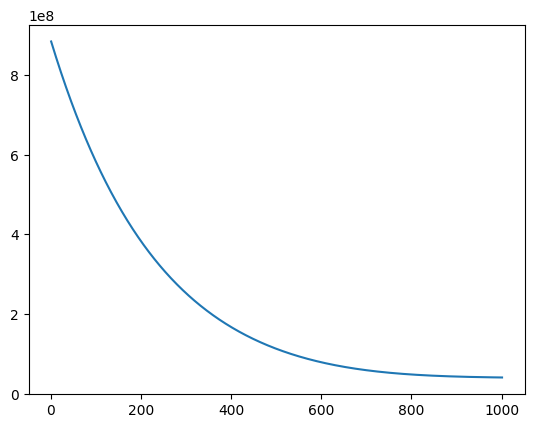

In [53]:
xpoints = np.array(count)
ypoints = np.array(grad_mag)
plt.plot(xpoints, ypoints)
plt.show()

In [54]:
predictions = predict_outcome(feature_matrix, new_weights)
errors = predictions - output
accuracy = (1-(errors/output))*100
av = np.average(accuracy)
av

87.12392421851949

In [55]:
#importing test_data
test_data = pd.read_csv('test.csv')

In [56]:
#standardizing some features
test_data["YearBuilt"] = 2023 - test_data["YearBuilt"]
test_data["YearRemodAdd"]=2023 - test_data["YearRemodAdd"]

test_features=[]
for i in test_data.columns:
    test_features.append(i)
test_features.pop()
test_output = 'SalePrice'
(test_matrix, t_output) = get_numpy_data(test_data, test_features,test_output)

In [57]:
#feature scaling
test_matrix = test_matrix.astype('float64')
for i in range(len(test_features)+1):
    test_matrix[:,i]/=test_matrix[:,i].max()

In [58]:
test_predictions = predict_outcome(test_matrix, new_weights)
t_errors = test_predictions - t_output
t_accuracy = (1-(t_errors/t_output))*100
t_av = np.average(t_accuracy)
t_av

82.9143987638152